# WeatherPy
----

#### Note
* Instructions have been included for each segment. 

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
output_data_file = "../cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Create empty lists to store data from API calls
new_cities = []
lat = []
lng = []
max_temp = []
wind_speed = []
humidity = []
cloudiness = []
country = []
datetime = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    
    try:
        new_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        print(f"Processing record {counter} | {city}")
    
    except:
        print("City not found. Skipping...")
        pass

Processing record 1 | pathein
Processing record 2 | ilulissat
Processing record 3 | port-aux-francais
Processing record 4 | nar'yan-mar
Processing record 5 | longyearbyen
Processing record 6 | blackmans bay
Processing record 7 | adamstown
Processing record 8 | cabo san lucas
Processing record 9 | moose jaw
Processing record 10 | barreirinhas
Processing record 11 | atafu village
Processing record 12 | hawaiian paradise park
Processing record 13 | waitangi
City not found. Skipping...
Processing record 15 | bilibino
Processing record 16 | flying fish cove
City not found. Skipping...
City not found. Skipping...
Processing record 19 | port lincoln
Processing record 20 | thunder bay
Processing record 21 | el abiodh sidi cheikh
Processing record 22 | port elizabeth
Processing record 23 | weno
Processing record 24 | west island
Processing record 25 | reinosa
Processing record 26 | college
Processing record 27 | afaahiti
Processing record 28 | puerto natales
Processing record 29 | iqaluit
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

weather_data = ({
    'City':new_cities,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': datetime
})

In [8]:
# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weather_data)
df_weather.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [9]:
# Visualize to confirm data appears
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pathein,16.7833,94.7333,74.39,82,6,5.86,MM,1702258167
1,Ilulissat,69.2167,-51.1000,28.42,74,100,12.66,GL,1702258167
2,Port-aux-Français,-49.3500,70.2167,39.22,79,74,21.18,TF,1702258167
3,Naryan-Mar,67.6713,53.0870,-8.90,91,100,11.01,RU,1702258095
4,Longyearbyen,78.2186,15.6401,31.84,74,75,12.66,SJ,1702258055


In [12]:
# Save Data to csv
df_weather.to_csv('weather_data.csv')

Inspect the data and remove the cities where the humidity > 100%

## Plotting the Data
----
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
* Save the plotted figures as .pngs

### Latitude vs. Temperature Plot

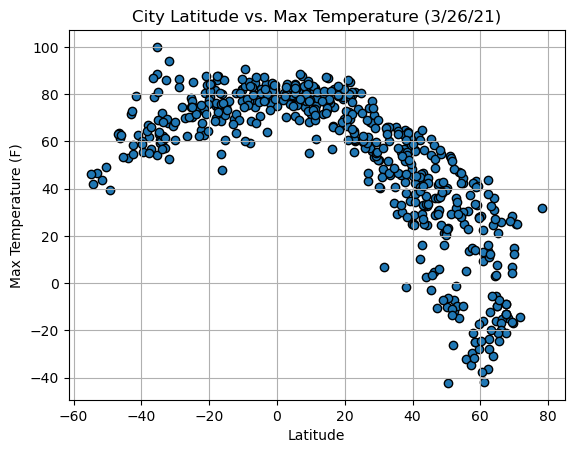

In [17]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('City Latitude vs. Max Temperature (3/26/21)')
plt.grid(True)

plt.savefig('../Images/Max_Temp_vs_Lat.png')

plt.show()

# Plotting relationship between latitude and max temperature.
# Max temperature is the highest for cities near the equator or slightly north and the lowest temperatures are very far north though cities have more extreme north latitude points

Max temperature is the highest for cities near the equator or slightly north and the lowest temperatures are very far north though cities have more extreme north latitude points

### Latitude vs. Humidity Plot

C:\Users\kxand\AppData\Local\Temp\ipykernel_1260\1033211604.py:1: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='x',edgecolors='black')


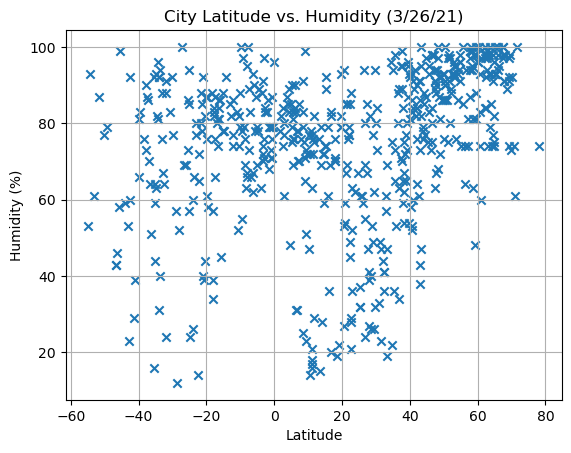

In [18]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='x',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('City Latitude vs. Humidity (3/26/21)')
plt.grid(True)

plt.savefig('../Images/Latitude_vs_Humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and humidity.
# There is no significant trend between latitude and humidity. Cities near latitude of 20 generally seems to have lower humidity and near the equator tends to have higher humidity

There is no significant trend between latitude and humidity. Cities near latitude of 20 generally seems to have lower humidity and near the equator tends to have higher humidity

### Latitude vs. Cloudiness Plot

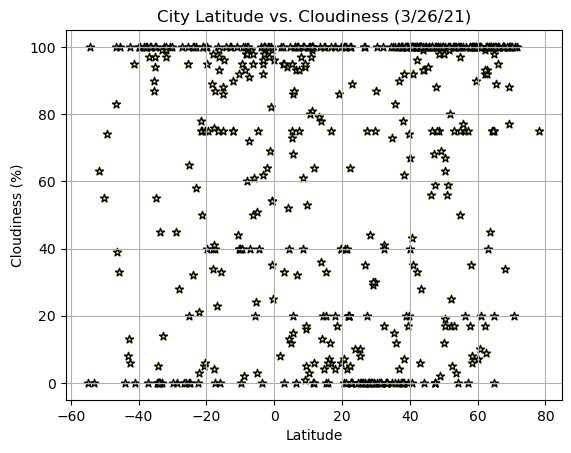

In [19]:
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'],marker='*',color='yellow',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('City Latitude vs. Cloudiness (3/26/21)')
plt.grid(True)

plt.savefig('../Images/Latitude_vs_Cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and cloudiness.
# There is no significant trend between latitude and cloudiness.

There is no significant trend between latitude and cloudiness.

### Latitude vs. Wind Speed Plot

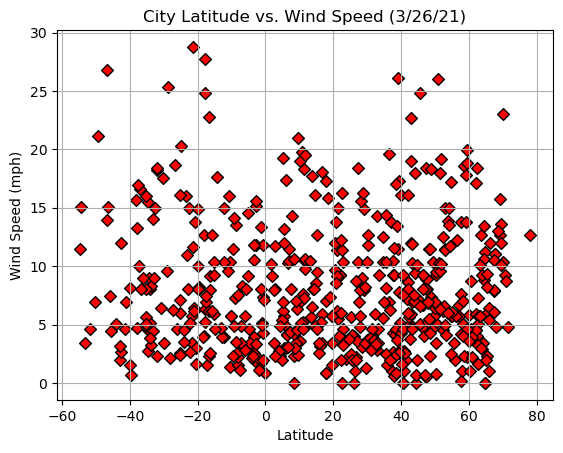

In [21]:
plt.scatter(df_weather['Lat'],df_weather['Wind Speed'],marker='D',color="red",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('City Latitude vs. Wind Speed (3/26/21)')
plt.grid(True)

plt.savefig('../Images/Latitude_vs_Wind_Speed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and wind speed.
# There is no significant trend between latitude and wind speed, not enough data points on the extremes where wind speed seems to increase slightly in the southern hemisphere to draw a conclusion

There is no significant trend between latitude and wind speed, not enough data points on the extremes where wind speed seems to increase slightly in the southern hemisphere to draw a conclusion

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [46]:
# Split data into northern and souther hemisphere based on latitude
df_Northern= df_weather.loc[df_weather["Lat"] > 0]
df_Southern = df_weather.loc[df_weather["Lat"] < 0]

The r-square is -0.8364371521064923
y = -1.4x + 95.29


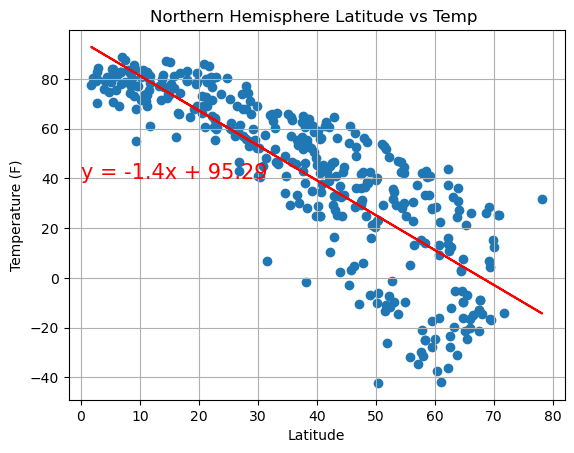

In [47]:
#set the data sets to compare
x_values = df_Northern["Lat"]
y_values = df_Northern["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../Images/Northern Hemisphere Latitude vs Temp.png')
plt.show()

In [48]:
# Quick check on southern hemisphere
df_Southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port-aux-Français,-49.3500,70.2167,39.22,79,74,21.18,TF,1702258167
5,Blackmans Bay,-43.0167,147.3167,71.53,53,8,1.99,AU,1702258168
6,Adamstown,-25.0660,-130.1015,70.32,57,0,7.14,PN,1702258054
9,Barreirinhas,-2.7469,-42.8264,79.20,84,99,11.81,BR,1702258169
10,Atafu Village,-8.5421,-172.5159,83.80,76,100,13.53,TK,1702258169


The r-square is 0.5957874632363152
y = 0.46x + 82.14


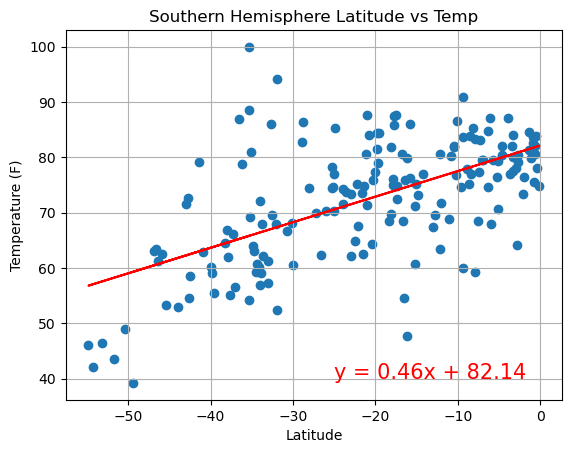

In [51]:
x_values = df_Southern["Lat"]
y_values = df_Southern["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Images/Southern Hemisphere Latitude vs Temp.png')
plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6996271094240193


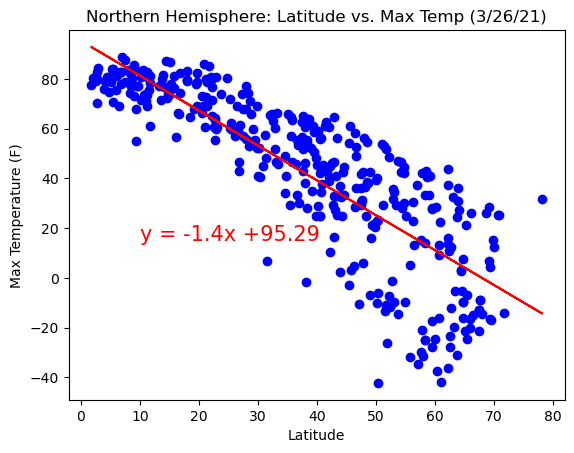

In [53]:
x_values = df_Northern['Lat']
y_values = df_Northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, marker='o', color='blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp (3/26/21)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/northernhemi_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in northern hemisphere.
# Max temperature decreases as you increase in latitude with few outliers

Max temperature decreases as you increase in latitude with few outliers

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3549627013495636


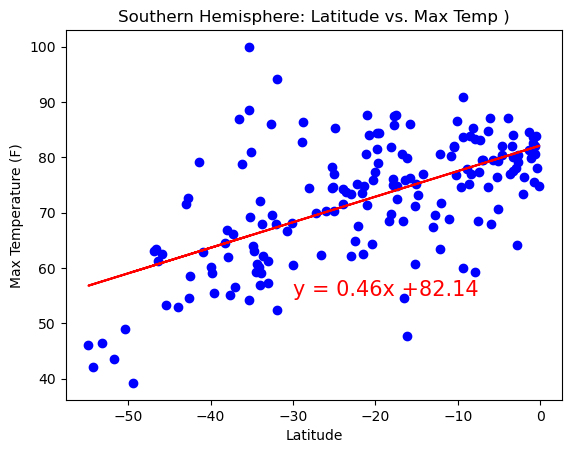

In [54]:
x_values = df_Southern['Lat']
y_values = df_Southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, marker='o',color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Max Temp )')
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/southernhem_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in southern hemisphere.
# Max temperature decreases as you decrease in latitude but more outliers than northern hemisphere

Max temperature decreases as you decrease in latitude but more outliers than northern hemisphere

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21159220192219108


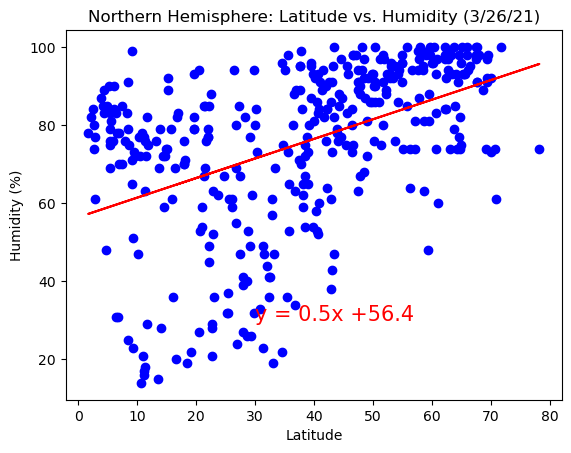

In [56]:
x_values = df_Northern['Lat']
y_values = df_Northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity (3/26/21)')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/northernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06536518098620135


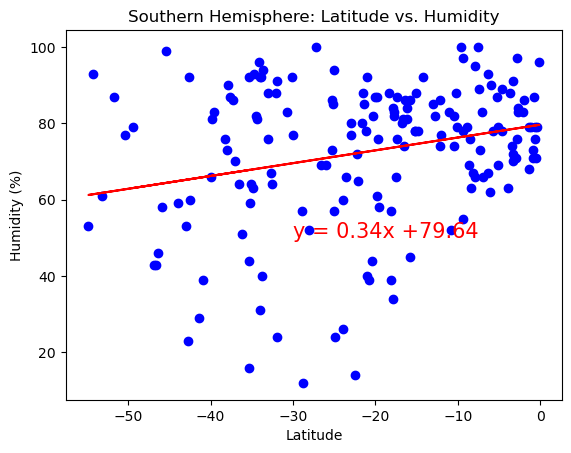

In [58]:
x_values = df_Southern['Lat']
y_values = df_Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/southernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in souther hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07168997630764767


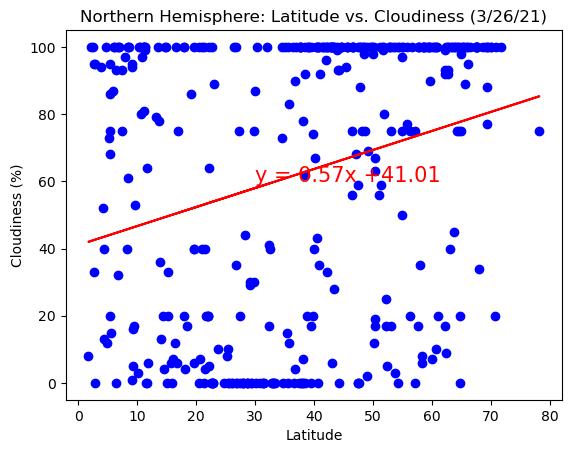

In [59]:
x_values = df_Northern['Lat']
y_values = df_Northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness (3/26/21)')
plt.annotate(line_eq,(30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/northernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02574351433841405


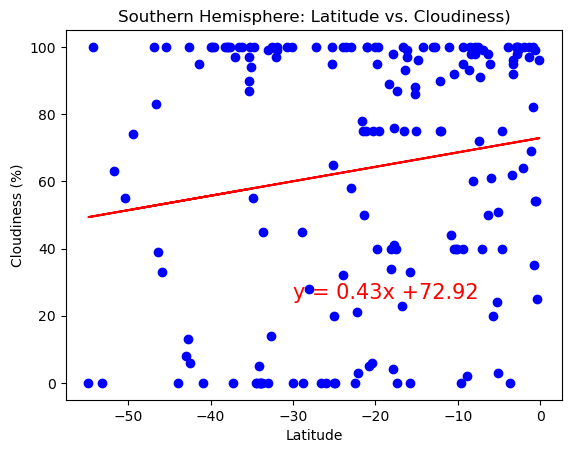

In [61]:
x_values = df_Southern['Lat']
y_values = df_Southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/southernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in southern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0017332047734148713


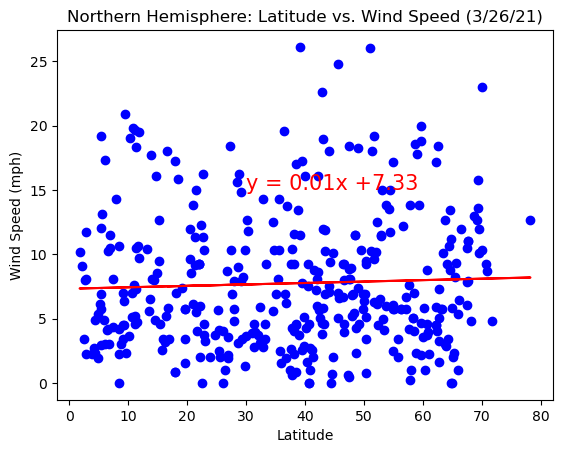

In [62]:
x_values = df_Northern['Lat']
y_values = df_Northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed (3/26/21)')
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/northernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03531035011808726


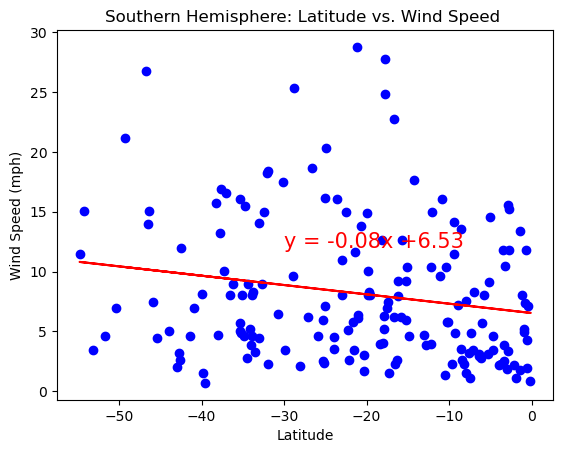

In [63]:
x_values = df_Southern['Lat']
y_values = df_Southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed ')
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('Images/southernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in southern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.